Support Vector Machines

In [23]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = load_digits()

In [4]:
X = df.data
y = df.target

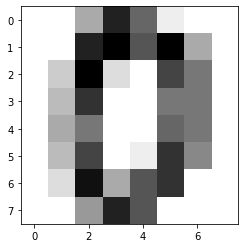

In [7]:
# have a look at the images
fig = plt.figure()
plt.imshow(df.images[0], cmap=plt.cm.binary)

In [8]:
# create model
svc_model = SVC(C = 0.1, kernel = "linear")

In [9]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=3)

In [10]:
svc_model.fit(X_train, y_train)
predictions = svc_model.predict(X_test)

In [11]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # print("Normalized confusion matrix")
    # else:
        # print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [15]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        47
           1       0.94      0.97      0.96        35
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        40
           4       1.00      0.98      0.99        44
           5       0.97      0.97      0.97        38
           6       1.00      0.92      0.96        25
           7       0.93      1.00      0.97        42
           8       0.96      0.93      0.95        29
           9       0.96      0.93      0.95        29

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.97       360



In [24]:
# actual ve predicted valueları yanyana array olarak görebiliyorum
actual_predictions = np.vstack((predictions, y_test))
actual_predictions

array([[0, 4, 1, 2, 0, 0, 8, 7, 6, 6, 3, 6, 9, 7, 4, 7, 4, 3, 2, 6, 7, 3,
        4, 7, 1, 0, 7, 4, 8, 3, 4, 0, 5, 5, 5, 1, 2, 9, 0, 0, 0, 8, 2, 3,
        7, 0, 1, 7, 1, 3, 8, 4, 2, 9, 6, 0, 4, 5, 4, 4, 7, 9, 9, 5, 0, 3,
        7, 4, 9, 1, 7, 0, 9, 3, 0, 2, 7, 8, 1, 1, 9, 3, 3, 2, 2, 3, 8, 2,
        4, 6, 9, 5, 8, 4, 7, 3, 7, 2, 5, 6, 5, 6, 1, 0, 6, 4, 8, 1, 5, 6,
        8, 8, 8, 6, 4, 0, 2, 7, 5, 0, 8, 5, 8, 4, 7, 0, 5, 9, 0, 1, 8, 4,
        7, 9, 6, 1, 2, 7, 1, 3, 5, 3, 5, 2, 7, 4, 9, 2, 0, 0, 9, 2, 8, 4,
        0, 9, 7, 0, 1, 4, 1, 8, 0, 7, 9, 1, 9, 7, 2, 7, 7, 0, 5, 3, 4, 0,
        5, 2, 3, 0, 3, 0, 1, 9, 5, 4, 8, 2, 6, 0, 9, 7, 8, 8, 7, 3, 0, 9,
        5, 3, 6, 3, 7, 9, 0, 5, 7, 6, 5, 3, 1, 0, 4, 3, 1, 0, 5, 3, 7, 3,
        2, 3, 5, 0, 7, 4, 5, 3, 0, 0, 5, 7, 5, 2, 4, 2, 9, 3, 3, 0, 7, 3,
        1, 3, 1, 7, 4, 7, 4, 5, 2, 1, 1, 4, 7, 1, 7, 9, 2, 5, 2, 5, 0, 9,
        2, 0, 7, 6, 5, 4, 5, 1, 4, 1, 8, 0, 7, 4, 7, 1, 3, 4, 9, 5, 0, 3,
        0, 5, 4, 3, 6, 1, 4, 3, 8, 5, 

In [25]:
# yukarıdaki actual ve predicted değerlerden birbirine eşit olmayan indisleri kaydettik
indices = np.where(actual_predictions[0,:] != actual_predictions[1,:])

In [26]:
indices

(array([ 20,  70,  79, 240, 257, 270, 321, 328, 344]),)

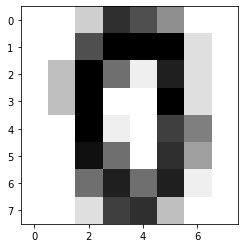

In [27]:
# imagelar mı gerçekten kötü yoksa benim model mi sıçtı ona bakıyoruz
plt.imshow(df.images[indices[0][0]], cmap = plt.cm.binary)
plt.show()

In [28]:
print(actual_predictions[:, indices[0][0]])

[7 4]
